In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-10-17 15:13:41--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.007s  

2024-10-17 15:13:41 (6.53 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
len(dataset)

1338

In [ ]:
dataset = pd.get_dummies(dataset, columns=['sex', 'region', 'smoker'], drop_first=True)

In [ ]:
dataset.head()

,age,bmi,children,expenses,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.9,0,16884.92,False,False,False,True,True
1,18,33.8,1,1725.55,True,False,True,False,False
2,28,33.0,3,4449.46,True,False,True,False,False
3,33,22.7,0,21984.47,True,True,False,False,False
4,32,28.9,0,3866.86,True,True,False,False,False


In [ ]:
#Creating test dataset:
test_dataset = dataset.sample(frac=0.2)
len(test_dataset)

268

In [ ]:
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
len(train_dataset)

1070

In [ ]:
train_dataset.head()

,age,bmi,children,expenses,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19.0,27.9,0.0,16884.92,False,False,False,True,True
1,18.0,33.8,1.0,1725.55,True,False,True,False,False
2,28.0,33.0,3.0,4449.46,True,False,True,False,False
3,33.0,22.7,0.0,21984.47,True,True,False,False,False
4,32.0,28.9,0.0,3866.86,True,True,False,False,False


In [ ]:
for column in train_dataset.columns:
    print(f"Column: {column}, Data Type: {train_dataset[column].dtype}")

Column: age, Data Type: float64
Column: bmi, Data Type: float64
Column: children, Data Type: float64
Column: expenses, Data Type: float64
Column: sex_male, Data Type: object
Column: region_northwest, Data Type: object
Column: region_southeast, Data Type: object
Column: region_southwest, Data Type: object
Column: smoker_yes, Data Type: object


In [ ]:
train_labels = train_dataset.pop("expenses")
train_labels.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


In [ ]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

,expenses
583,17626.24
1289,7147.47
980,25517.11
803,38792.69
27,12268.63


In [ ]:
test_dataset.head()

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
583,32,23.7,1,False,False,True,False,False
1289,44,34.3,1,True,False,True,False,False
980,54,25.5,1,True,False,False,False,False
803,18,42.2,0,False,False,True,False,True
27,55,32.8,2,False,True,False,False,False


In [ ]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mae',metrics=['mae', 'mse'])
model.build()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (1070, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

In [ ]:
history = model.fit(train_dataset,train_labels,epochs=200,validation_split=0.5,verbose=0,)
print(history)

9/9 - 0s - 4ms/step - loss: 2453.2959 - mae: 2453.2959 - mse: 23442054.0000
Testing set Mean Abs Error: 2453.30 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


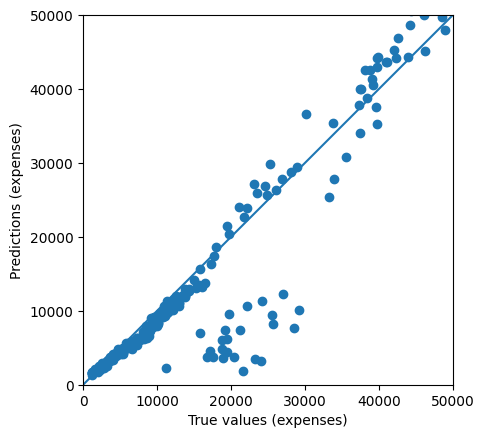

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
